**Revised on 3/5/2024: Changed source files**

This is the skeleton code for Task 1 of the midterm project. The files that are downloaded in step 4 are based on the [Ember 2018 dataset](https://arxiv.org/abs/1804.04637), and contain the features (and corresponding labels) extracted from 1 million PE files, split into 80\% training and 20\% test datasets. The code used for for feature extraction is available [here](https://colab.research.google.com/drive/16q9bOlCmnTquPtVXVzxUj4ZY1ORp10R2?usp=sharing). However, the preprocessing and featurization process may take up to 3 hours on Google Colab. Hence, I recommend using the processed datasets (Step 4) to speed up your development.

Also, note that there is a new optional step 8.5 - To speed up your experiments, you may want to sample the original dataset of 800k training samples and 200k test samples to smaller datasets.

**Step 1:** Mount your Google Drive by clicking on "Mount Drive" in the Files section (panel to the left of this text.)

**Step 2:** Go to Runtime -> Change runtime type and select T4 GPU.

**Step 3:** Create a folder in your Google Drive, and rename it to "vMalConv"

**Step 4:** Download the pre-processed training and test datasets.

In [ ]:
# ~8GB
!wget https://dsci6015s24-midterm.s3.amazonaws.com/v2/X_train.dat
!wget https://dsci6015s24-midterm.s3.amazonaws.com/v2/X_test.dat
!wget https://dsci6015s24-midterm.s3.amazonaws.com/v2/y_train.dat
!wget https://dsci6015s24-midterm.s3.amazonaws.com/v2/y_test.dat
!wget https://dsci6015s24-midterm.s3.amazonaws.com/v2/metadata.csv

--2024-04-03 05:52:08--  https://dsci6015s24-midterm.s3.amazonaws.com/v2/X_train.dat
Resolving dsci6015s24-midterm.s3.amazonaws.com (dsci6015s24-midterm.s3.amazonaws.com)... 52.216.139.19, 52.216.112.11, 52.217.122.153, ...
Connecting to dsci6015s24-midterm.s3.amazonaws.com (dsci6015s24-midterm.s3.amazonaws.com)|52.216.139.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7619200000 (7.1G) [binary/octet-stream]
Saving to: ‘X_train.dat.1’

X_train.dat.1       100%[===================>]   7.10G  11.8MB/s    in 9m 47s  

2024-04-03 06:01:56 (12.4 MB/s) - ‘X_train.dat.1’ saved [7619200000/7619200000]

--2024-04-03 06:01:57--  https://dsci6015s24-midterm.s3.amazonaws.com/v2/X_test.dat
Resolving dsci6015s24-midterm.s3.amazonaws.com (dsci6015s24-midterm.s3.amazonaws.com)... 52.217.169.217, 52.216.36.201, 54.231.160.233, ...
Connecting to dsci6015s24-midterm.s3.amazonaws.com (dsci6015s24-midterm.s3.amazonaws.com)|52.217.169.217|:443... connected.
HTTP request sent, a

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 5:** Copy the downloaded files to vMalConv

In [ ]:
%cd /content/

/content


In [ ]:
!cp /content/X_train.dat /content/drive/MyDrive/vMalConv/X_train.dat
!cp /content/X_test.dat /content/drive/MyDrive/vMalConv/X_test.dat
!cp /content/y_train.dat /content/drive/MyDrive/vMalConv/y_train.dat
!cp /content/y_test.dat /content/drive/MyDrive/vMalConv/y_test.dat
!cp /content/metadata.csv /content/drive/MyDrive/vMalConv/metadata.csv

**Step 6:** Download and install Ember:

In [ ]:
!pip install git+https://github.com/PFGimenez/ember.git

  Cloning https://github.com/PFGimenez/ember.git to /tmp/pip-req-build-6ytfmhu7
  Running command git clone --filter=blob:none --quiet https://github.com/PFGimenez/ember.git /tmp/pip-req-build-6ytfmhu7
  Resolved https://github.com/PFGimenez/ember.git to commit 3b82fe63069884882e743af725d29cc2a67859f1
  Preparing metadata (setup.py) ... done
  Created wheel for ember: filename=ember-0.1.0-py3-none-any.whl size=13050 sha256=4a89a168173c17b18b6de7040fa5fb09775d33eac4543cd743a0e250a4c00cdb
  Stored in directory: /tmp/pip-ephem-wheel-cache-ai9s8igg/wheels/8f/69/f9/1917c8df03b25fe53e8e2f6cb2c9f61a43dec179b19b10ab9f
Successfully built ember


In [ ]:
!pip install lief

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 28.4 MB/s eta 0:00:00


**Step 7:** Read vectorized features from the data files.

In [ ]:
import ember
X_train, y_train, X_test, y_test = ember.read_vectorized_features("drive/MyDrive/vMalConv/")
metadata_dataframe = ember.read_metadata("drive/MyDrive/vMalConv/")

**Step 8:** Get rid of rows with no labels.

In [ ]:
# prompt: read X_train, X_test, y_train y_test from drive

# Mount your Google Drive
drive.mount('/content/drive')

# Change directory to Google Drive
%cd /content/drive/MyDrive/vMalConv

# Read vectorized features from the data files.
X_train, y_train, X_test, y_test = ember.read_vectorized_features(".")
metadata_dataframe = ember.read_metadata(".")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/vMalConv


In [ ]:
labelrows = (y_train != -1)
X_train = X_train[labelrows]
y_train = y_train[labelrows]

In [ ]:
import h5py
h5f = h5py.File('X_train.h5', 'w')
h5f.create_dataset('X_train', data=X_train)
h5f.close()
h5f = h5py.File('y_train.h5', 'w')
h5f.create_dataset('y_train', data=y_train)
h5f.close()

In [ ]:
!cp /content/X_train.h5 /content/drive/MyDrive/vMalConv/X_train.h5
!cp /content/y_train.h5 /content/drive/MyDrive/vMalConv/y_train.h5

**Optional Step 8.5:** To speed up your experiments, you may want to sample the original dataset of 800k training samples and 200k test samples to smaller datasets. You can use the [Pandas Dataframe sample() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html), or come up with your own sampling methodology. Be mindful of the fact that the database is heavily imbalanced.

In [ ]:
#optional


> **Task 1:** Complete the following code to build the architecture of MalConv in PyTorch:

In [ ]:
import torch
import torch.nn as nn

class MalConv(nn.Module):
    def __init__(self, input_length=2000000, embedding_dim=8, window_size=16, output_dim=1):
        super(MalConv, self).__init__()
        self.embed = nn.Embedding(257, embedding_dim)  # 256 unique bytes, embedding dimension
        self.conv1 = nn.Conv1d(in_channels=embedding_dim, out_channels=128, kernel_size=window_size, stride=window_size, bias=True)
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=128, kernel_size=window_size, stride=window_size, bias=True)
        self.fc1 = nn.Linear(128, 128)
        self.fc2 = nn.Linear(128, output_dim)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embed(x.clamp(min=0,max=256))
        x = x.transpose(1, 2)  # Conv1d expects (batch_size, channels, length)
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = nn.functional.max_pool1d(x, kernel_size=x.size(2))  # Global max pooling
        x = x.squeeze(2)  # Remove singleton dimension
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Example of creating a MalConv model
input_length = 2000000  # The fixed length for each input file
model = MalConv(input_length=input_length)
print(model)

# Example input (a batch of byte sequences, padded or truncated to the fixed length)
# For actual use, replace 'torch.randint' with your preprocessed byte sequence tensor
example_input = torch.randint(0, 256, (4, input_length), dtype=torch.long)  # 4 examples, random data
output = model(example_input)
print(output)  # The output probabilities for each example


MalConv(
  (embed): Embedding(257, 8)
  (conv1): Conv1d(8, 128, kernel_size=(16,), stride=(16,))
  (conv2): Conv1d(128, 128, kernel_size=(16,), stride=(16,))
  (fc1): Linear(in_features=128, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)
tensor([[0.5400],
        [0.5336],
        [0.5338],
        [0.5332]], grad_fn=<SigmoidBackward0>)


In [ ]:
X_train = X_train[:20000]
y_train = y_train[:20000]

**Step 8:** Partial fit the standardScaler to avoid overloading the memory:

In [ ]:
from sklearn.preprocessing import StandardScaler
mms = StandardScaler()
for x in range(0,20000,1000):
  mms.partial_fit(X_train[x:x+1000])

In [ ]:
X_train = mms.transform(X_train)

In [ ]:
## Reshape to create 3 channels ##
#import numpy as np
#X_train = np.reshape(X_train,(-1,1,2381))
#y_train = np.reshape(y_train,(-1,1,1))

**Load, Tensorize, and Split** The following code takes care of converting the training data into Torch Tensors, and then splits it into 80% training and 20% validation datasets.

In [ ]:
import numpy as np
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Assuming MalConv class definition is already provided as above

# Convert your numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Split the data into training and validation sets (80% training, 20% validation)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_tensor, y_train_tensor, test_size=0.2, random_state=42
)

# Create TensorDatasets and DataLoaders for training and validation sets
train_dataset = TensorDataset(X_train_split, y_train_split)
val_dataset = TensorDataset(X_val_split, y_val_split)

batch_size = 16  # Adjust based on your GPU memory
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)




> **Task 2:** Complete the following code to train the model on the GPU for 15 epochs, with a batch size of 64. If you are on Google Colab, don't forget to change the kernel in Runtime -> Change runtime type -> T4 GPU.

In [ ]:
# prompt: Complete the following code to train the model on the GPU for 15 epochs, with a batch size of 64
import torch
import torch.nn as nn
import torch.optim as optim
import os
# Training Loop with Validation
num_epochs = 15  # Adjust the number of epochs as needed

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the GPU
model.to(device)

# Loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adjust learning rate as needed

# Directory to save model checkpoints
save_dir = "drive/MyDrive/vMalConv/"



for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)


        # Forward pass:
        outputs = model(inputs)  # Pass inputs through model to get predictions

        # Calculate loss:
        loss = criterion(outputs.squeeze(), labels)  # Compute loss with squeezed outputs

        # Backward pass and optimization:
        optimizer.zero_grad()  # Clear gradients for the next iteration
        loss.backward()  # Backpropagate loss
        optimizer.step()  # Update model parameters



        running_loss += loss.item()

    print(f'Epoch {epoch+1}, Training Loss: {running_loss/len(train_loader)}')

    # Validation step
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            val_loss += loss.item()
    print(f'Validation Loss: {val_loss/len(val_loader)}')

    # Save checkpoint every 5 epochs
    if (epoch + 1) % 5 == 0:
        checkpoint_path = os.path.join(save_dir, f'model_epoch_{epoch+1}.pt')
        torch.save(model.state_dict(), checkpoint_path)
        print(f'Model checkpoint saved to {checkpoint_path}')



Epoch 1, Training Loss: 2.0224985171295673e-22
Validation Loss: 2.0224941454517572e-22
Epoch 2, Training Loss: 2.0224985161198254e-22
Validation Loss: 2.0224941454517572e-22
Epoch 3, Training Loss: 2.0224985158673899e-22
Validation Loss: 2.0224941454517572e-22
Epoch 4, Training Loss: 2.0224985156149543e-22
Validation Loss: 2.0224941454517572e-22
Epoch 5, Training Loss: 2.0224985151100835e-22
Validation Loss: 2.0224941454517572e-22
Model checkpoint saved to drive/MyDrive/vMalConv/model_epoch_5.pt
Epoch 6, Training Loss: 2.0224985166246965e-22
Validation Loss: 2.0224941454517572e-22
Epoch 7, Training Loss: 2.0224985173820028e-22
Validation Loss: 2.0224941454517572e-22
Epoch 8, Training Loss: 2.0224985149838657e-22
Validation Loss: 2.0224941454517572e-22
Epoch 9, Training Loss: 2.0224985196539224e-22
Validation Loss: 2.0224941454517572e-22
Epoch 10, Training Loss: 2.022498518391745e-22
Validation Loss: 2.0224941454517572e-22
Model checkpoint saved to drive/MyDrive/vMalConv/model_epoch_10.

**Task 3:** Complete the following code to evaluate your trained model on the test data.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Convert test data to PyTorch tensors
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create a TensorDataset and DataLoader for test data
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Ensure the model is in evaluation mode
model.eval()

# Lists to store model predictions and actual labels
predictions = []
labels = []

with torch.no_grad():
    for inputs, labels_batch in test_loader:

      # Move inputs to the appropriate device
        inputs = inputs.to(device)
        labels_batch = labels_batch.to(device)

      # Forward pass
        outputs = model(inputs)

      # Convert logits to probabilities using sigmoid activation
        probabilities = torch.sigmoid(outputs)

      # Convert probabilities to binary predictions (0 or 1)
        predicted = (probabilities > 0.5).float()

      # Store predictions and labels
        predictions.extend(predicted.cpu().numpy())
        labels.extend(labels_batch.cpu().numpy())

# Flatten nested arrays
labels = np.array(labels).ravel()
flat_predictions = np.array(predictions).ravel()

# Compute metrics
accuracy = accuracy_score(labels, flat_predictions)
precision = precision_score(labels, flat_predictions)
recall = recall_score(labels, flat_predictions)

print(f'Test Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


Test Accuracy: 0.5000
Precision: 0.0000
Recall: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


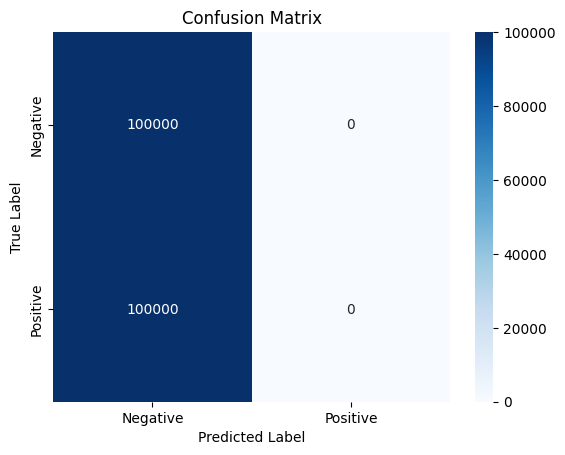

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(labels, flat_predictions)

# Define labels for better interpretation
labels = ['Negative', 'Positive']

# Plot confusion matrix as heatmap with seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [ ]:
# Save the model
torch.save(model.state_dict(), '/content/drive/MyDrive/vMalConv/my_model.pth')

import numpy as np
import torch
import lief

model = MalConv()
model.load_state_dict(torch.load('/content/drive/MyDrive/vMalConv/my_model.pth'))
model.eval()

def testPE(pe_path):
  # Load the PE file
  try:
    pe = lief.parse(pe_path)
  except lief.read_error:
    return "Invalid PE file"

  # Extract Features
  bytez = np.fromfile(pe_path, dtype=np.uint8)
  if len(bytez) < 2000000:
    bytez = np.pad(bytez, (0, 2000000 - len(bytez)), mode='constant')
  features = torch.tensor(bytez[:2000000], dtype=torch.long).unsqueeze(0)

  # Run the model on the features
  with torch.no_grad():
    output = model(features)

  # Return the prediction
  return "Malware" if output.item() > 0.5 else "Benign"

  # Example usage
file_path = "/content/calc.exe"
prediction = testPE(file_path)
print(f"The file {file_path} is predicted as {prediction}")

Unable to find the section associated with BOUND_IMPORT


The file /content/calc.exe is predicted as Benign
